In [132]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Train Data

In [4]:
train_df = pd.read_csv(
    'train.csv.gz', 
    compression='gzip', 
    header=0, sep=',', 
    error_bad_lines=False
)
print('{0:,} registros a las {1}'.format(len(train_df), datetime.now()))
train_df.head()

180,761 registros a las 2020-09-01 22:33:58.921689


,accepts_mercadopago,available_quantity,avg_gmv_item_domain_30days,avg_gmv_item_sel,avg_gmv_seller_bday,avg_qty_orders_item_domain_30days,avg_qty_orders_item_sel_30days,avg_si_item_sel_30day,benefit,boosted,...,total_orders_sel_30days,total_si_domain_30days,total_si_item_30days,total_si_sel_30days,total_visits_domain,total_visits_item,total_visits_seller,uid,user_id,warranty
0,True,59,938.031376,2153.933091,135195.200333,3.430563,12.407860,13.691450,0.001,False,...,23364.0,56717.0,17.0,25781.0,7993972,543,854813,cb5bfac7-229a-4e3e-96dd-80b2ad3972c1,NaN,Garantía de fábrica: 12 meses
1,True,37,159.826531,240.325973,19338.230000,3.142739,4.429577,4.511599,0.001,False,...,10693.0,81455.0,5.0,10891.0,7821316,1789,1422288,b0f9aa19-00d5-4afd-aa77-45be7c849562,NaN,NaN
2,True,9,67.635391,86.066296,154.919333,2.633771,2.592593,2.722222,0.001,False,...,140.0,16792.0,8.0,147.0,1303909,1473,17801,fd59890a-f2c2-4282-b2ee-c68f25e20697,151157147.0,NaN
3,True,12,92.085756,332.848400,554.747333,3.280069,12.620000,12.840000,0.001,False,...,631.0,1988.0,14.0,642.0,139419,7473,44336,72340acf-2a1c-4214-a604-132e0cb56939,NaN,Garantía de fábrica: 90 días
4,True,5,156.905222,955.997475,3154.791667,2.737876,3.666667,4.363636,0.001,False,...,363.0,8707.0,32.0,432.0,209373,416,46206,84da1314-814c-4d4f-be23-3de9ea1da4b6,NaN,Garantía del vendedor: 90 días


In [90]:
numerical_features = [
    'available_quantity',
    'avg_gmv_item_domain_30days',
    'avg_gmv_item_sel',
    'avg_gmv_seller_bday',
    'avg_qty_orders_item_domain_30days',
    'avg_qty_orders_item_sel_30days',
    'avg_si_item_sel_30day',
    'health',
    'offset',  
    'original_price',
    'price',
    'print_position',
    'qty_items_dom',
    'qty_items_sel',
    'sold_quantity',
    'total_asp_item_domain_30days',
    'total_asp_item_sel_30days',
    'total_gmv_domain_bday',
    'total_gmv_item_30days',
    'total_items_domain',
    'total_items_seller',
    'total_orders_domain_30days',
    'total_orders_item_30days',
    'total_orders_sel_30days',
    'total_si_domain_30days',
    'total_si_item_30days',
    'total_si_sel_30days',
    'total_visits_item',
    'total_visits_seller'
]

categorical_features = [
    # Booleans
    'accepts_mercadopago',
    'boosted',
    'free_shipping',
    'is_pdp',
    
    # Categoricals
    'category_id',
    'deal_print_id',
    'domain_id',
    'deal_print_id',
    'product_id',
    'item_id'
    'listing_type_id',
    'logistic_type',
    'platform',
    'site_id',
    'tags',
    'uid',
    'user_id',
    'warranty'
]

date_features = [
    'date',
    'print_server_timestamp'
]

trash_features = [
    'main_picture',
    'title'
]

In [127]:
data = []
for column in numerical_features:
    df = pd.DataFrame(train_df[column].describe([.25,.5,.75,.8,.9,.95,.99])).T
    df.insert(0, 'feature', column)
    data.append(df)

pd.concat(data, ignore_index=True).set_index('feature').style.format("{:,.0f}", na_rep="")

,count,mean,std,min,25%,50%,75%,80%,90%,95%,99%,max
feature,,,,,,,,,,,,
available_quantity,"180,761","2,075","11,235",0,18,67,366,597,"1,744","5,998","99,039","99,999"
avg_gmv_item_domain_30days,"176,837",331,487,5,86,169,316,403,786,"1,345","2,604","3,778"
avg_gmv_item_sel,"176,837","1,122","4,048",5,144,263,677,852,"2,226","3,563","14,075","57,283"
avg_gmv_seller_bday,"176,837","10,842","26,544",1,798,"2,773","9,314","12,231","22,535","41,477","159,970","244,988"
avg_qty_orders_item_domain_30days,"176,837",4,3,1,3,4,5,5,7,9,16,38
avg_qty_orders_item_sel_30days,"176,837",13,25,1,4,7,13,15,23,38,170,258
avg_si_item_sel_30day,"176,837",18,33,1,5,9,19,21,33,52,190,466
health,"180,761",1,0,0,1,1,1,1,1,1,1,1
offset,"180,761",245,570,0,0,96,288,336,624,960,"2,448","9,984"


In [154]:
plotting_columns = [
    # Booleans
    'accepts_mercadopago',
    'boosted',
    'free_shipping',
    'is_pdp',
    
    # Categoricals
    #'domain_id',
    'listing_type_id',
    'logistic_type',
    'platform',
    #'tags',
    #'warranty'
]

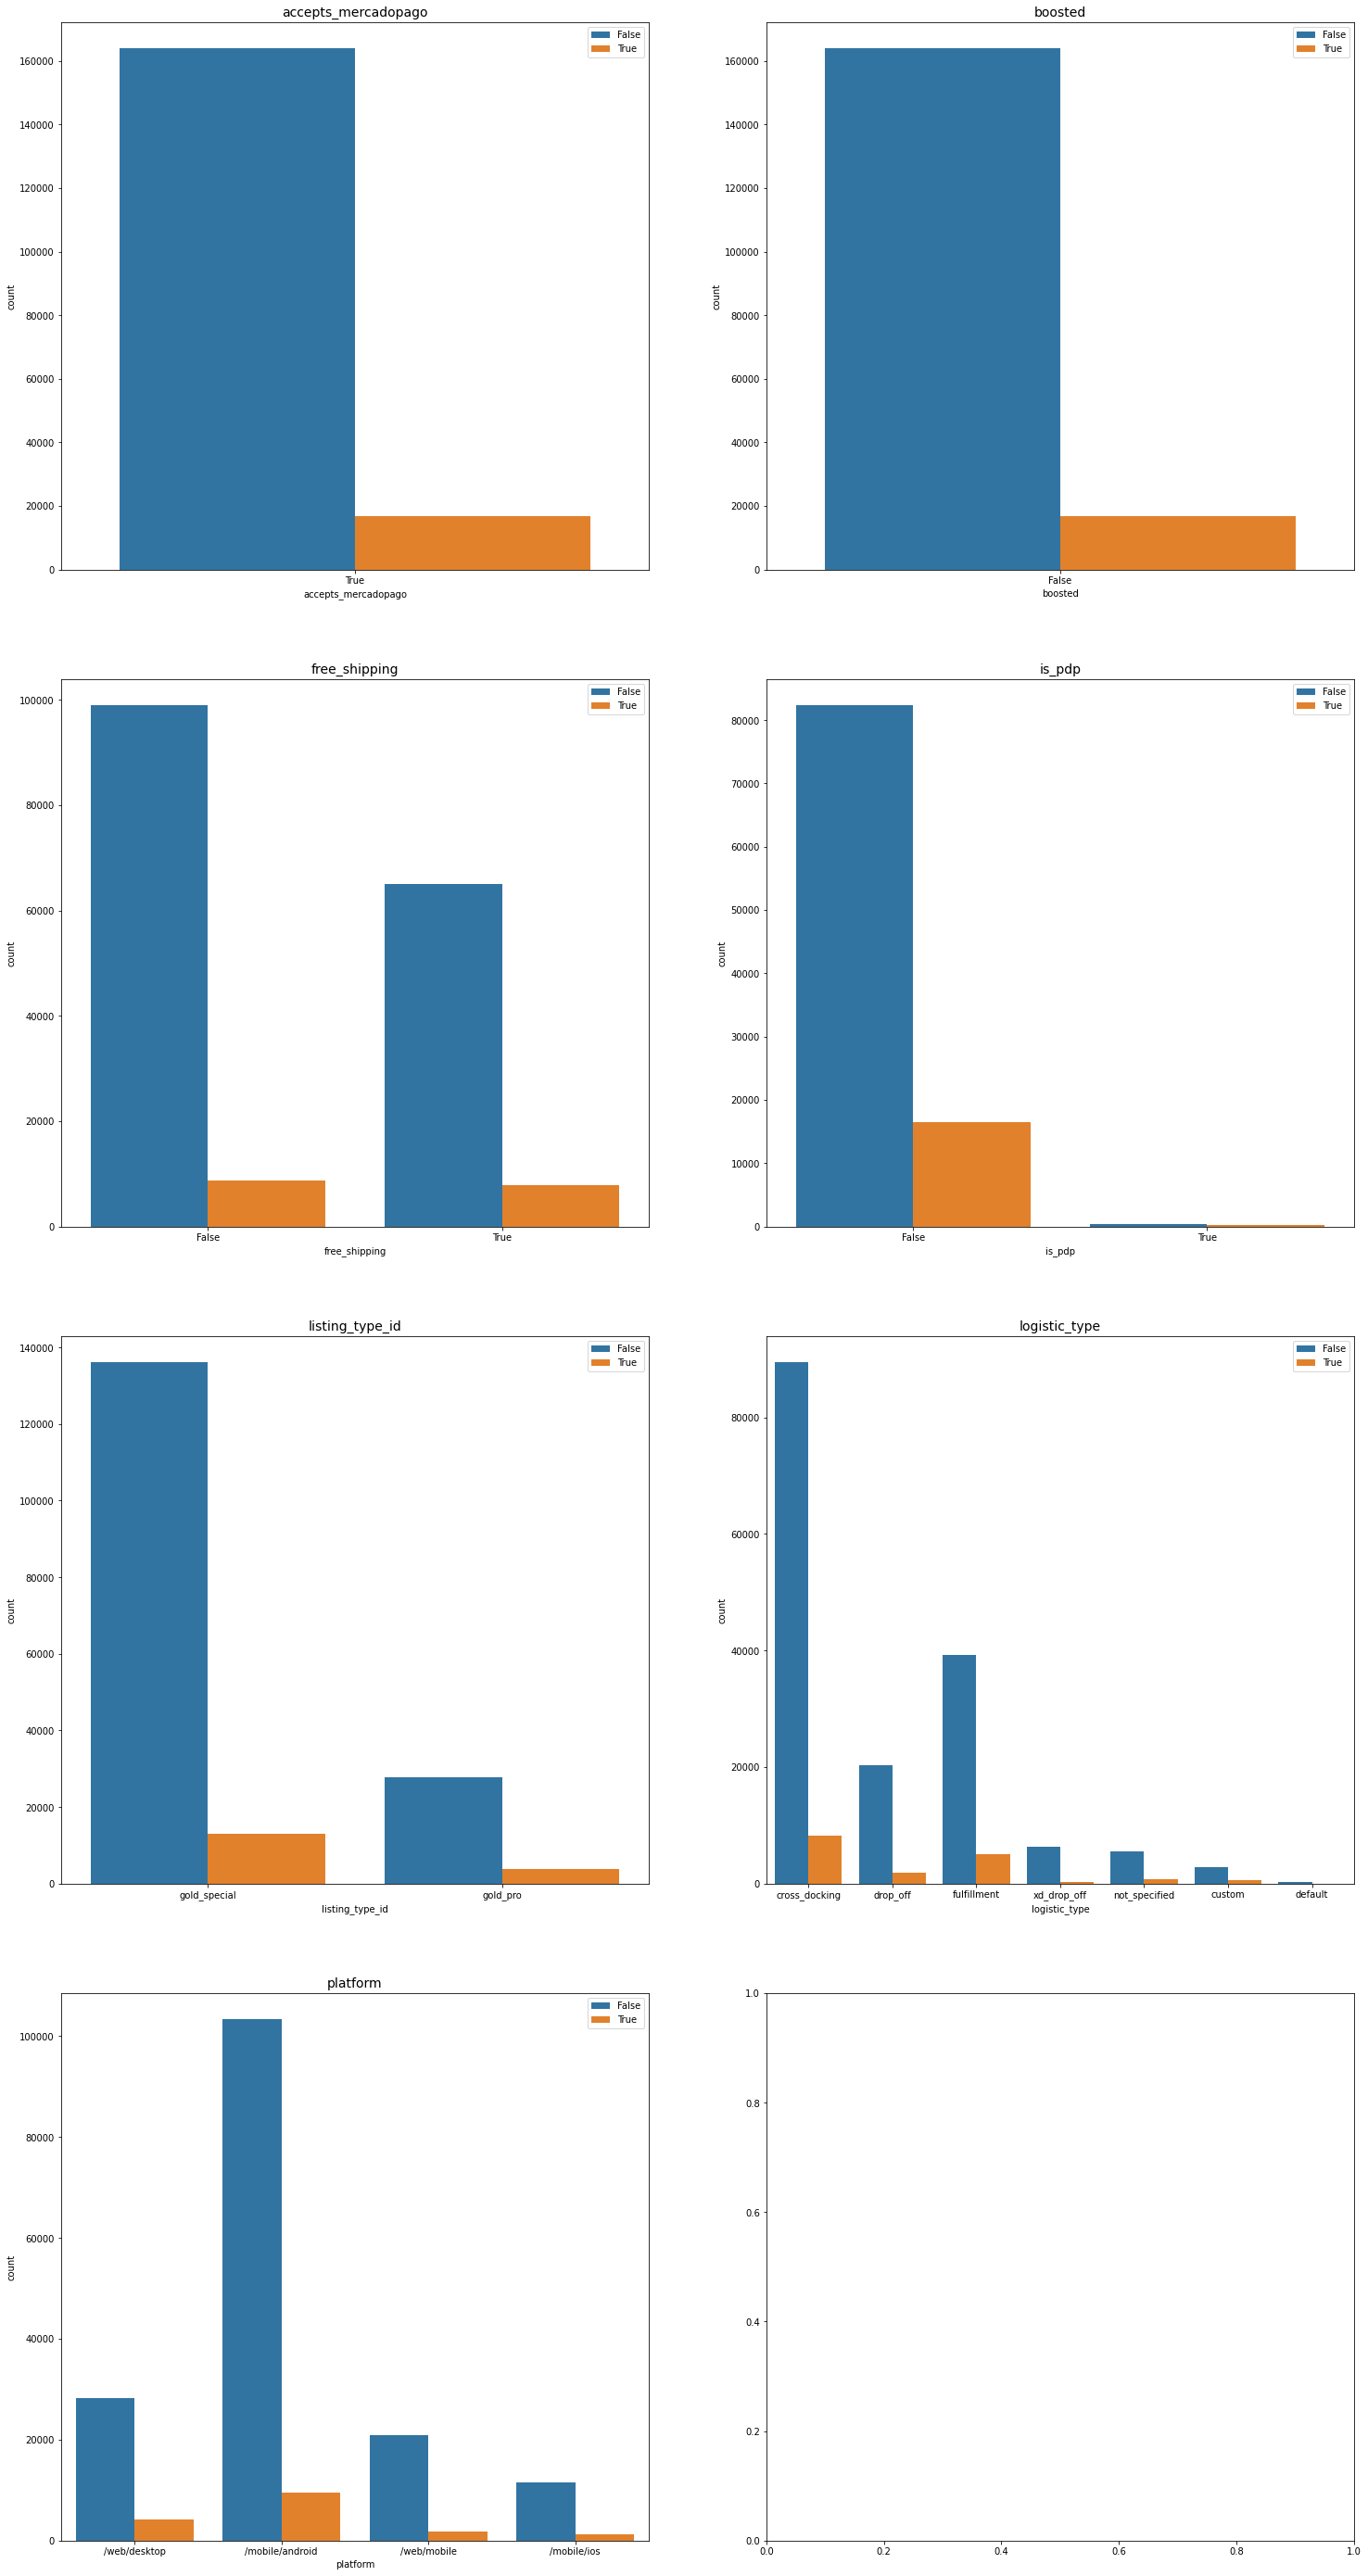

In [158]:
fig, axes = plt.subplots(len(plotting_columns)//2+1, 2, figsize=(25,50))
axes = axes.ravel()

for i, column in enumerate(plotting_columns):
    sns.countplot(x=column, hue="conversion", data=train_df, ax=axes[i])
    axes[i].legend(loc='best')
    axes[i].set_title(column, fontsize=14)

In [206]:
correlations_df = train_df[numerical_features].corr()\
    .reset_index()\
    .melt(id_vars=['index'], value_vars=numerical_features)\
    .rename(columns={'index':'feature_1', 'variable':'feature_2', 'value':'correlation'})
correlations_df.head()

,feature_1,feature_2,correlation
0,available_quantity,available_quantity,1.000000
1,avg_gmv_item_domain_30days,available_quantity,-0.030466
2,avg_gmv_item_sel,available_quantity,-0.027117
3,avg_gmv_seller_bday,available_quantity,-0.042194
4,avg_qty_orders_item_domain_30days,available_quantity,0.075127


In [207]:
correlations_df['correlation'].describe()

count    841.000000
mean       0.162699
std        0.286833
min       -0.284704
25%       -0.026080
50%        0.065163
75%        0.244988
max        1.000000
Name: correlation, dtype: float64

In [212]:
important_correlations_df = correlations_df[(correlations_df['correlation'] != 1) & (correlations_df['correlation'] >= .75)]\
    .sort_values(['feature_1', 'feature_2'], ascending=[True, True])\
    .drop_duplicates('correlation', 'first')

In [213]:
print(len(important_correlations_df))
important_correlations_df

16


,feature_1,feature_2,correlation
436,avg_gmv_item_domain_30days,total_asp_item_domain_30days,0.856978
670,avg_gmv_seller_bday,total_orders_sel_30days,0.790084
179,avg_qty_orders_item_sel_30days,avg_si_item_sel_30day,0.926570
299,original_price,price,0.967906
444,original_price,total_asp_item_domain_30days,0.751698
445,price,total_asp_item_domain_30days,0.783813
563,qty_items_dom,total_items_domain,0.940498
621,qty_items_dom,total_orders_domain_30days,0.918120
593,qty_items_sel,total_items_seller,0.914234
825,qty_items_sel,total_visits_seller,0.808329


In [231]:
correlations_df[(correlations_df['feature_1'] == 'total_orders_domain_30days') & (correlations_df['feature_2'] == 'total_items_domain')]

,feature_1,feature_2,correlation
572,total_orders_domain_30days,total_items_domain,0.776236


In [229]:
numeric_features_selected = [
    {
        'keep' : ['total_asp_item_domain_30days'],
        'remove' : ['avg_gmv_item_domain_30days', 'original_price', 'price']
    },
    {
        'keep' : ['total_orders_sel_30days'],
        'remove' : ['avg_gmv_seller_bday', 'total_si_sel_30days']
    },
    {
        'keep' : ['total_orders_domain_30days'],
        'remove' : ['qty_items_dom', 'total_items_domain', 'total_si_domain_30days']
    },
    {
        'keep' : ['avg_qty_orders_item_sel_30days'],
        'remove' : ['avg_si_item_sel_30day']
    },
    {
        'keep' : ['total_orders_item_30days'],
        'remove' : ['total_si_item_30days', 'total_visits_item']
    },
    {
        'keep' : ['total_items_seller'],
        'remove' : ['qty_items_sel', 'total_visits_seller']
    },
]

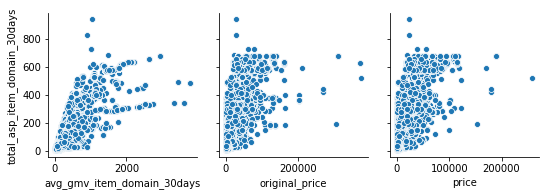

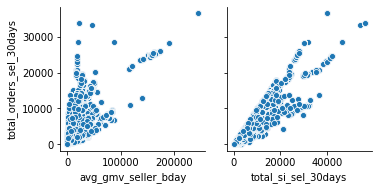

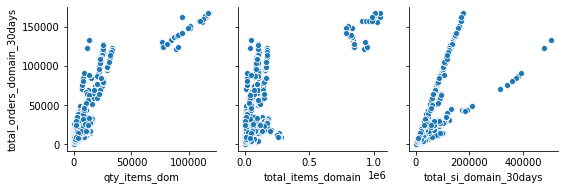

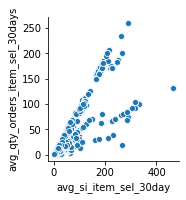

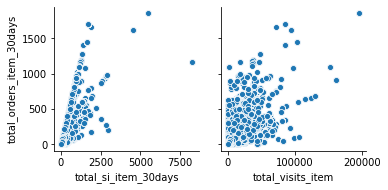

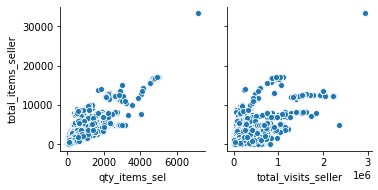

In [230]:
for entry in numeric_features_selected:
    keep, remove = list(entry.values())
    sns.pairplot(train_df, y_vars=keep, x_vars=remove)

In [234]:
len(train_df['tags'].unique())

1203

In [235]:
train_df['tags'].value_counts()

[brand_verified, good_quality_picture, good_quality_thumbnail, loyalty_discount_eligible, immediate_payment, cart_eligible]                                                                                   26863
[brand_verified, good_quality_picture, good_quality_thumbnail, loyalty_discount_eligible, today_promotion, immediate_payment, cart_eligible]                                                                  24314
[today_promotion, brand_verified, good_quality_picture, good_quality_thumbnail, loyalty_discount_eligible, immediate_payment, cart_eligible]                                                                   6280
[loyalty_discount_eligible, today_promotion, brand_verified, good_quality_picture, good_quality_thumbnail, immediate_payment, cart_eligible]                                                                   6135
[good_quality_thumbnail, loyalty_discount_eligible, today_promotion, brand_verified, good_quality_picture, immediate_payment, cart_eligible]            

In [26]:
train_df.dtypes

accepts_mercadopago                     bool
available_quantity                     int64
avg_gmv_item_domain_30days           float64
avg_gmv_item_sel                     float64
avg_gmv_seller_bday                  float64
avg_qty_orders_item_domain_30days    float64
avg_qty_orders_item_sel_30days       float64
avg_si_item_sel_30day                float64
benefit                              float64
boosted                                 bool
category_id                           object
conversion                              bool
date                                  object
deal_print_id                         object
domain_id                             object
etl_version                           object
free_shipping                           bool
fulfillment                             bool
full_name                             object
health                               float64
is_pdp                                object
product_id                           float64
item_id   